# Mục tiêu, bài toán

Sử dụng model LSTM để dự đoán và phân tích tình hình biến động giá cổ phiếu( FPT, MSN, PNJ, VIC)

# 1. Tiền xử lý

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive/')
os.chdir('./drive/MyDrive/CCT_Code/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df=pd.read_csv("FPT.csv")
df.head()

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


In [ ]:
df.rename(columns={"Date/Time": "Date_Time"}, inplace=True)

In [ ]:
display("Missing value:",df.isnull().sum().sum())

'Missing value:'

0

In [ ]:
df[df.duplicated(subset=['Date_Time'],keep=False)]

,Ticker,Date_Time,Open,High,Low,Close,Volume,Open Interest
Date_Time,,,,,,,,


In [ ]:
df["Date_Time"]=pd.to_datetime(df.Date_Time,format="%m/%d/%Y %H:%M")
df.index=df['Date_Time']

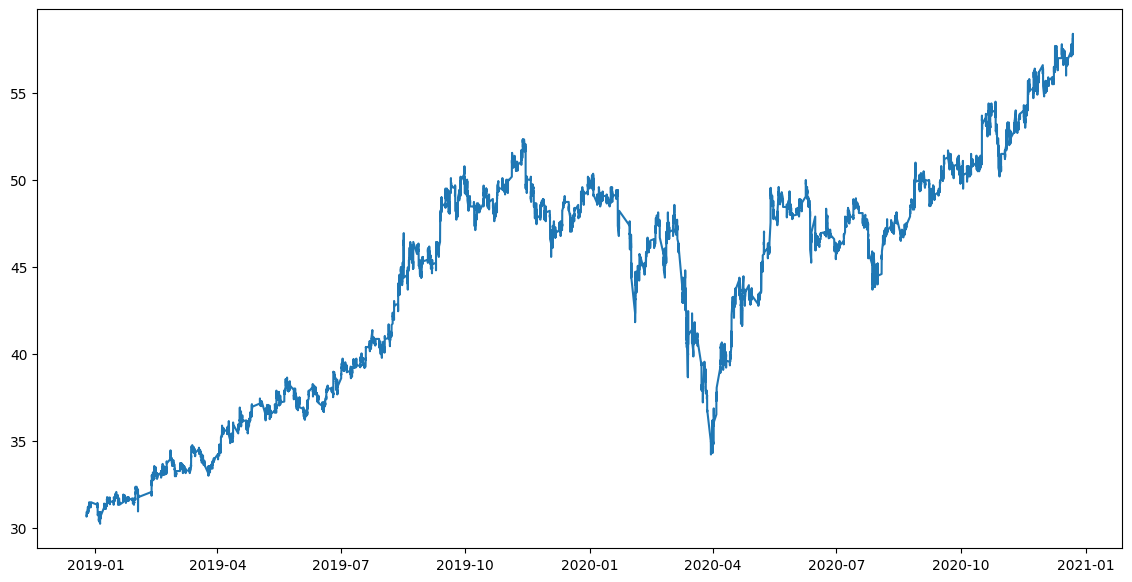

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(df["Close"],label='Close Price history')

# Dataset

In [ ]:
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['Date_Time','Close'])

for i in range(0,len(data)):
    new_dataset["Date_Time"][i]=data['Date_Time'][i]
    new_dataset["Close"][i]=data["Close"][i]

In [ ]:
new_dataset.index=new_dataset.Date_Time
new_dataset.drop("Date_Time",axis=1,inplace=True)

final_dataset=new_dataset.values
final_dataset

array([[30.89],
       [30.81],
       [30.74],
       ...,
       [58.2],
       [58.1],
       [58.1]], dtype=object)

Chia dữ liệu train test 7/3

In [ ]:
training_data_len = int(np.ceil( len(final_dataset) * .7 ))

In [ ]:
train_data=final_dataset[0:int(training_data_len),:]
valid_data=final_dataset[int(training_data_len):,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])

x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

## Model 0

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(Dropout(0.3))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.35))
lstm_model.add(Dense(25, activation = 'relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
lstm_model.fit(x_train_data, y_train_data, validation_split=0.2, epochs=1,batch_size=1,verbose=1)

54500/54500 [==============================] - 1895s 35ms/step - loss: 6.7940e-04 - val_loss: 8.0362e-05


In [ ]:
lstm_model.save("saved_model0.h5")

## Model 1

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:
lstm_model.fit(x_train_data,y_train_data,epochs=4,batch_size=21,verbose=1)

Epoch 1/4
3245/3245 [==============================] - 203s 63ms/step - loss: 2.7148e-05 - accuracy: 8.8073e-05
Epoch 2/4
3245/3245 [==============================] - 195s 60ms/step - loss: 2.0136e-05 - accuracy: 8.8073e-05
Epoch 3/4
3245/3245 [==============================] - 197s 61ms/step - loss: 1.3598e-05 - accuracy: 8.8073e-05
Epoch 4/4
3245/3245 [==============================] - 199s 61ms/step - loss: 1.0470e-05 - accuracy: 8.8073e-05


In [ ]:
lstm_model.fit(x_train_data,y_train_data,epochs=4,batch_size=21,verbose=1)

Epoch 1/4
3245/3245 [==============================] - 200s 62ms/step - loss: 9.3211e-06 - accuracy: 8.8073e-05
Epoch 2/4
3245/3245 [==============================] - 201s 62ms/step - loss: 8.8781e-06 - accuracy: 8.8073e-05
Epoch 3/4
3245/3245 [==============================] - 199s 61ms/step - loss: 8.4356e-06 - accuracy: 8.8073e-05
Epoch 4/4
3245/3245 [==============================] - 201s 62ms/step - loss: 8.4361e-06 - accuracy: 8.8073e-05


In [ ]:
lstm_model.fit(x_train_data, y_train_data, validation_split=0.2, epochs=4,batch_size=21,verbose=1)

Epoch 1/4
2596/2596 [==============================] - 182s 70ms/step - loss: 6.9769e-06 - accuracy: 1.1009e-04 - val_loss: 1.6112e-05 - val_accuracy: 0.0000e+00
Epoch 2/4
2596/2596 [==============================] - 168s 65ms/step - loss: 7.0704e-06 - accuracy: 1.1009e-04 - val_loss: 1.5649e-05 - val_accuracy: 0.0000e+00
Epoch 3/4
2596/2596 [==============================] - 171s 66ms/step - loss: 7.0457e-06 - accuracy: 1.1009e-04 - val_loss: 8.3105e-06 - val_accuracy: 0.0000e+00
Epoch 4/4
2596/2596 [==============================] - 171s 66ms/step - loss: 6.5533e-06 - accuracy: 1.1009e-04 - val_loss: 1.1457e-05 - val_accuracy: 0.0000e+00


Model đồ có val_loss đã bắt đầu tăng nên ko train tiếp nữa

In [ ]:
lstm_model.save("saved_model.h5")

## Model 1.5

In [ ]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
lstm_model.fit(x_train_data, y_train_data, validation_split=0.2, epochs=4,batch_size=8,verbose=1)

Epoch 1/4
6813/6813 [==============================] - 433s 64ms/step - loss: 2.9961e-05 - val_loss: 1.7442e-05
Epoch 2/4
6813/6813 [==============================] - 423s 62ms/step - loss: 1.6358e-05 - val_loss: 1.5335e-05
Epoch 3/4
6813/6813 [==============================] - 423s 62ms/step - loss: 1.1960e-05 - val_loss: 9.4313e-06
Epoch 4/4
6813/6813 [==============================] - 423s 62ms/step - loss: 1.0078e-05 - val_loss: 1.1548e-05


Model không cải thiện Val_loss ở epoch cuối nên không train tiếp nữa

In [ ]:
lstm_model.save("saved_model1.h5")

## So sánh kết quả

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model0= load_model('saved_model0.h5')

model1= load_model('saved_model.h5')

model2= load_model('saved_model1.h5')

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train_data, y_train_data, test_size=0.2, random_state=42)

# In kích thước của tập x_val và y_val
print("Kích thước x_val:", x_val.shape)
print("Kích thước y_val:", y_val.shape)

Kích thước x_val: (13625, 60, 1)
Kích thước y_val: (13625,)


### Loss

In [ ]:
evaluation0 = model0.evaluate(x_val, y_val)

evaluation1 = model1.evaluate(x_val, y_val)

evaluation2 = model2.evaluate(x_val, y_val)

426/426 [==============================] - 9s 20ms/step - loss: 8.8308e-06


### Biểu diễn kết quả

In [ ]:
inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price0 =model0.predict(X_test)
closing_price1 =model1.predict(X_test)
closing_price2 =model2.predict(X_test)

closing_price0=scaler.inverse_transform(closing_price0)
closing_price1=scaler.inverse_transform(closing_price1)
closing_price2=scaler.inverse_transform(closing_price2)


914/914 [==============================] - 18s 19ms/step


In [ ]:
train_data=new_dataset[:int(training_data_len)]
valid_data0=new_dataset[int(training_data_len):]
valid_data1=new_dataset[int(training_data_len):]
valid_data2=new_dataset[int(training_data_len):]

valid_data0['Predictions']=closing_price0
valid_data1['Predictions']=closing_price1
valid_data2['Predictions']=closing_price2

<ipython-input-30-a12afda65f09>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data0['Predictions']=closing_price0
<ipython-input-30-a12afda65f09>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_data1['Predictions']=closing_price1
<ipython-input-30-a12afda65f09>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

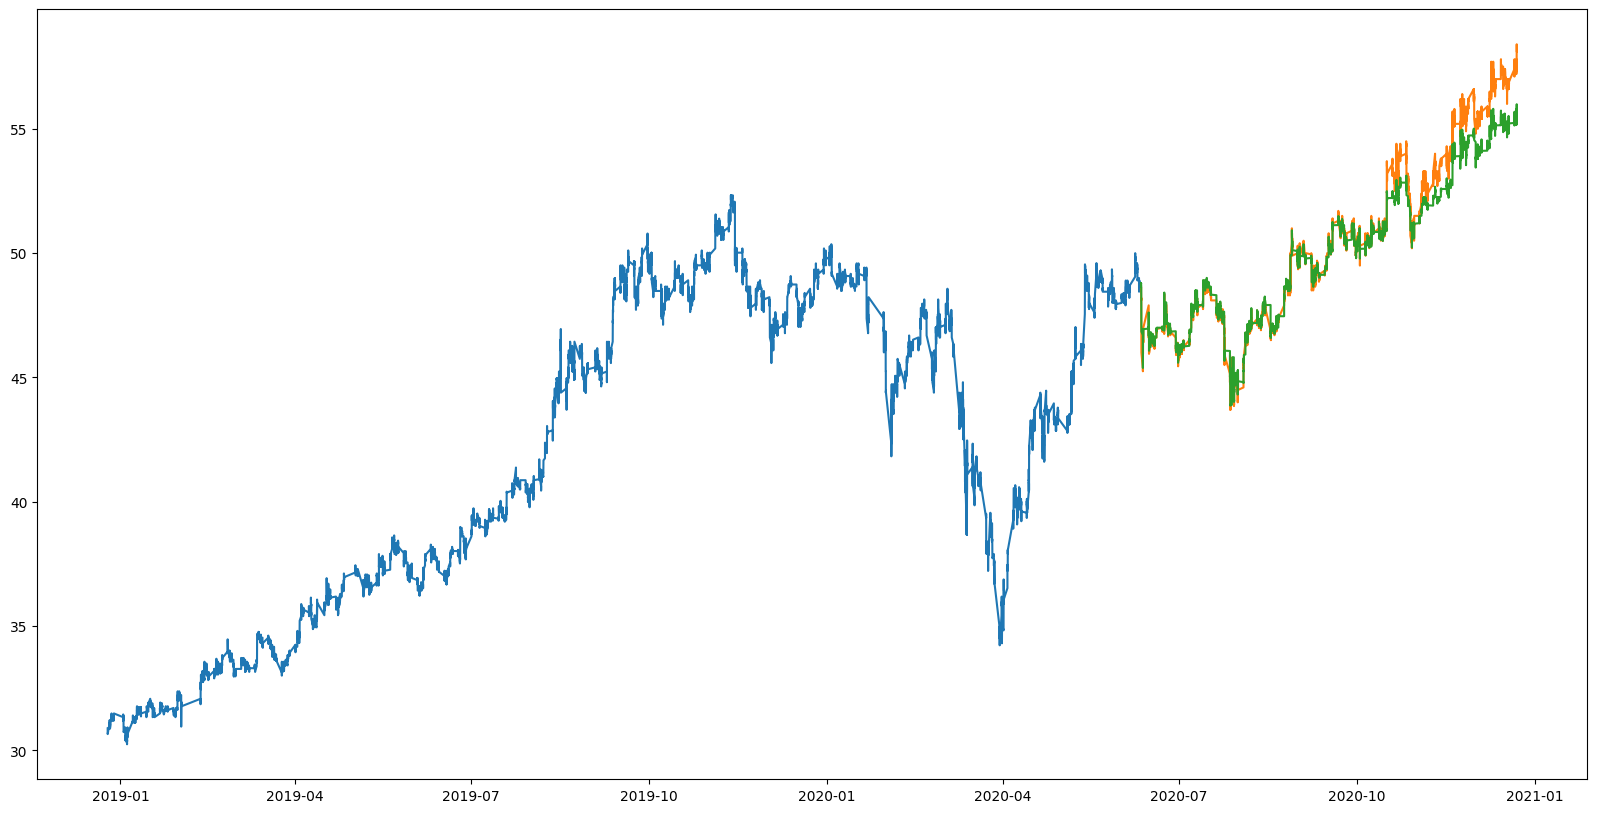

In [ ]:
plt.plot(train_data['Close'])
plt.plot(valid_data0[['Close',"Predictions"]])

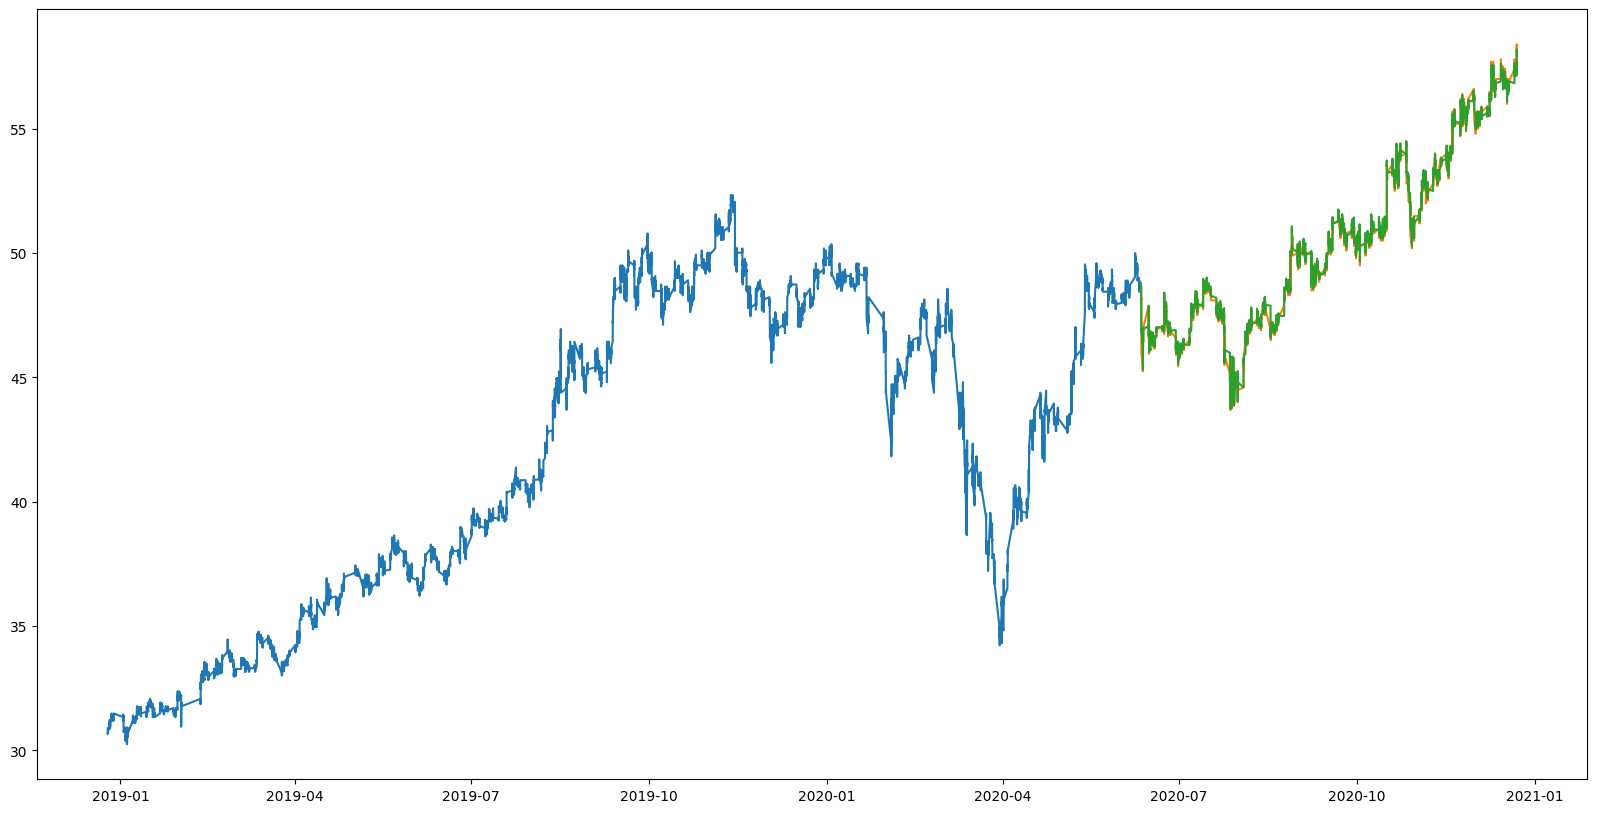

In [ ]:
plt.plot(train_data['Close'])
plt.plot(valid_data1[['Close',"Predictions"]])

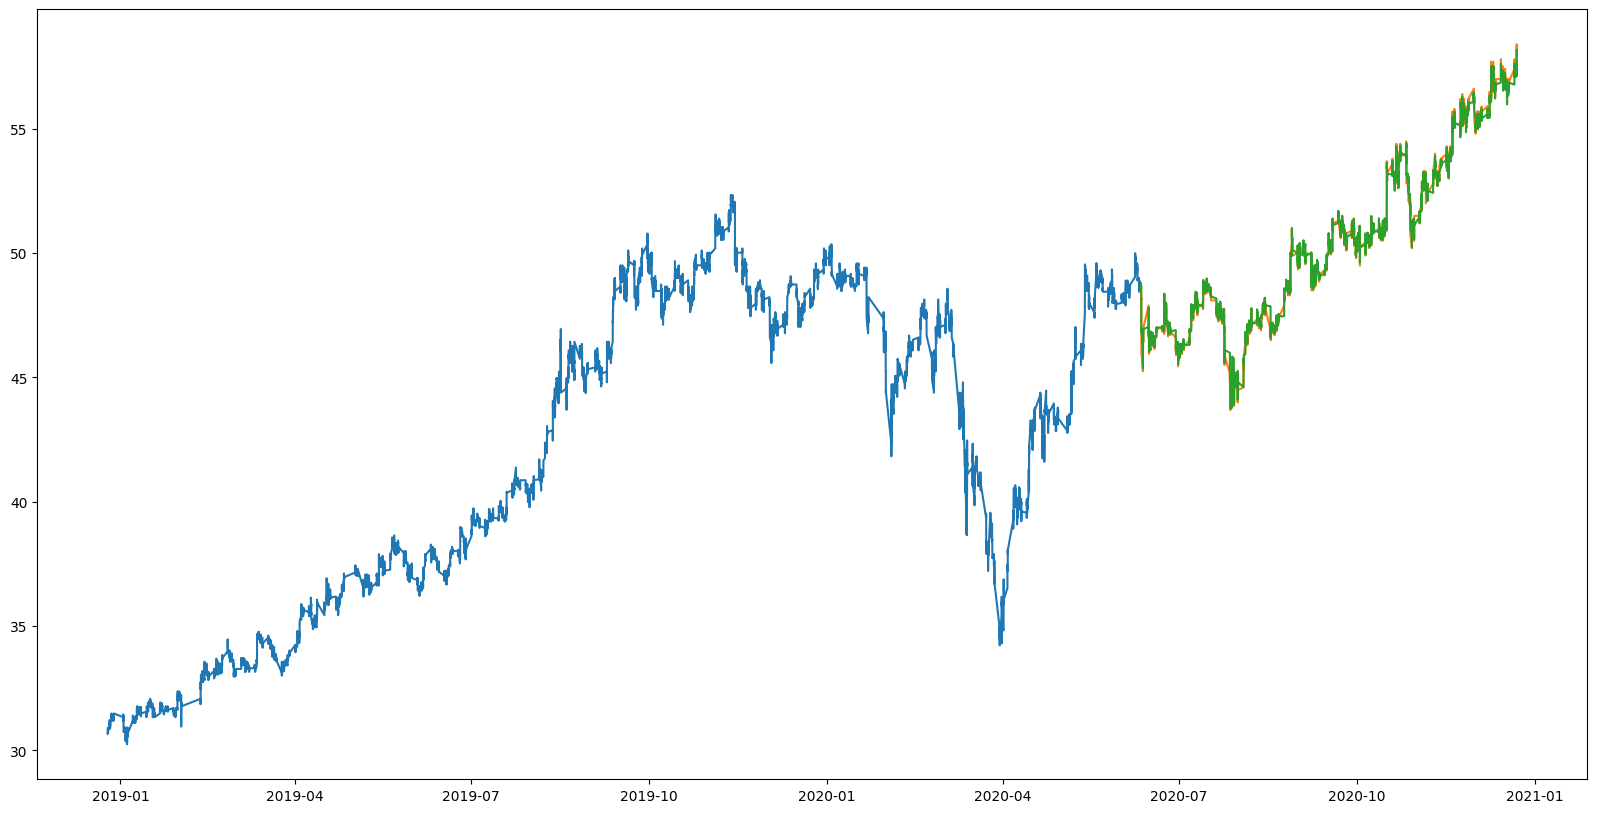

In [ ]:
plt.plot(train_data['Close'])
plt.plot(valid_data2[['Close',"Predictions"]])

Ta thấy model 1 có dự đoán chính xác nhất